## Preblur for bosonic continuation

Demo notebook that shows that preblur for bosonic functions is correctly implemented and has the desired effect.

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.environ['HOME'] + '/Programs/ana_cont')
from ana_cont import continuation as cont

<ipython-input-2-462089601d22>:9: RuntimeWarning: invalid value encountered in true_divide
  kernel = (w_full**2)[None, :] / ((w_full**2)[None, :] + (iw**2)[:, None])


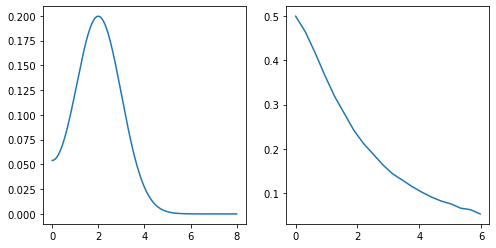

In [2]:
nw_full = 801
w_full = np.linspace(0., 8., num=nw_full, endpoint=True)
spectrum = np.exp(-(w_full - 2.)**2 / 2.) + np.exp(-(w_full + 2.)**2 / 2.)
spectrum /= 2. * np.trapz(spectrum, w_full)

beta = 20.
niw = 20
iw = 2. * np.pi / beta * np.arange(niw)
kernel = (w_full**2)[None, :] / ((w_full**2)[None, :] + (iw**2)[:, None])
kernel[0, 0] = 1.
chi_exact = np.trapz(kernel * spectrum, w_full, axis=1)
rng = np.random.RandomState(4712)
noise_unscaled = rng.randn(niw)
noise_amplitude = 1e-3
chi = chi_exact + noise_amplitude * noise_unscaled

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))
ax[0].plot(w_full, spectrum)
ax[1].plot(iw, chi)
plt.show()

In [3]:
nw = 801
w = np.linspace(0, 8., num=nw, endpoint=True)
probl = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=w, im_data=chi, kernel_mode='freq_bosonic')
model = np.ones_like(w)
model /= np.trapz(model, w)
err = np.ones_like(iw) * noise_amplitude

/home/josef/Programs/ana_cont/ana_cont/kernels.py:25: RuntimeWarning: invalid value encountered in true_divide
  kernel = (self.re_axis ** 2)[None, :] \


801 data points on real axis
20 data points on imaginary axis
16 significant singular values
Precomputation of coefficient matrices...
log10(alpha) = 12.00,	chi2 = 3.044e+06,   S = -1.304e-11,   nfev = 1,   norm = 1.000
log10(alpha) = 11.30,	chi2 = 3.044e+06,   S = -3.259e-10,   nfev = 5,   norm = 1.000
log10(alpha) = 10.60,	chi2 = 3.043e+06,   S = -8.145e-09,   nfev = 7,   norm = 1.000
log10(alpha) = 9.90,	chi2 = 3.038e+06,   S = -2.032e-07,   nfev = 9,   norm = 0.999
log10(alpha) = 9.20,	chi2 = 3.012e+06,   S = -5.027e-06,   nfev = 12,   norm = 0.997
log10(alpha) = 8.51,	chi2 = 2.889e+06,   S = -1.194e-04,   nfev = 14,   norm = 0.986
log10(alpha) = 7.81,	chi2 = 2.391e+06,   S = -2.365e-03,   nfev = 16,   norm = 0.936
log10(alpha) = 7.11,	chi2 = 1.225e+06,   S = -2.615e-02,   nfev = 18,   norm = 0.794
log10(alpha) = 6.41,	chi2 = 2.801e+05,   S = -1.073e-01,   nfev = 19,   norm = 0.604
log10(alpha) = 5.71,	chi2 = 4.677e+04,   S = -1.952e-01,   nfev = 19,   norm = 0.508
log10(alpha) = 5

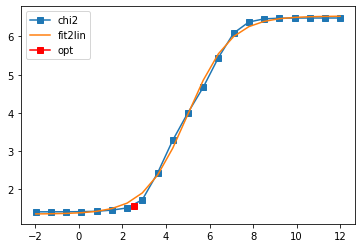

/home/josef/Programs/ana_cont/ana_cont/kernels.py:25: RuntimeWarning: invalid value encountered in true_divide
  kernel = (self.re_axis ** 2)[None, :] \
/home/josef/Programs/ana_cont/ana_cont/kernels.py:93: RuntimeWarning: invalid value encountered in true_divide
  integrand_1 = self.gaussian_numeric[None, None, :] * (self.w_integration[None, None, :] + self.re_axis[None, :, None]) ** 2 \
/home/josef/Programs/ana_cont/ana_cont/kernels.py:96: RuntimeWarning: invalid value encountered in true_divide
  integrand_2 = self.gaussian_numeric[None, None, :] * (self.w_integration[None, None, :] - self.re_axis[None, :, None]) ** 2 \


801 data points on real axis
20 data points on imaginary axis
13 significant singular values
Precomputation of coefficient matrices...
log10(alpha) = 12.00,	chi2 = 3.059e+06,   S = -1.293e-11,   nfev = 1,   norm = 1.000
log10(alpha) = 11.30,	chi2 = 3.058e+06,   S = -3.231e-10,   nfev = 5,   norm = 1.000
log10(alpha) = 10.60,	chi2 = 3.057e+06,   S = -8.075e-09,   nfev = 7,   norm = 1.000
log10(alpha) = 9.90,	chi2 = 3.052e+06,   S = -2.015e-07,   nfev = 9,   norm = 0.999
log10(alpha) = 9.20,	chi2 = 3.027e+06,   S = -4.984e-06,   nfev = 12,   norm = 0.997
log10(alpha) = 8.51,	chi2 = 2.905e+06,   S = -1.184e-04,   nfev = 14,   norm = 0.985
log10(alpha) = 7.81,	chi2 = 2.409e+06,   S = -2.352e-03,   nfev = 16,   norm = 0.936
log10(alpha) = 7.11,	chi2 = 1.243e+06,   S = -2.618e-02,   nfev = 18,   norm = 0.792
log10(alpha) = 6.41,	chi2 = 2.884e+05,   S = -1.082e-01,   nfev = 19,   norm = 0.598
log10(alpha) = 5.71,	chi2 = 5.028e+04,   S = -1.981e-01,   nfev = 19,   norm = 0.500
log10(alpha) = 5

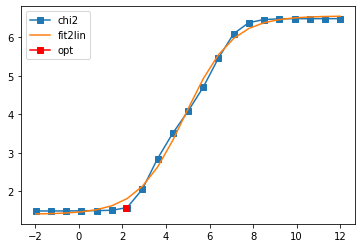

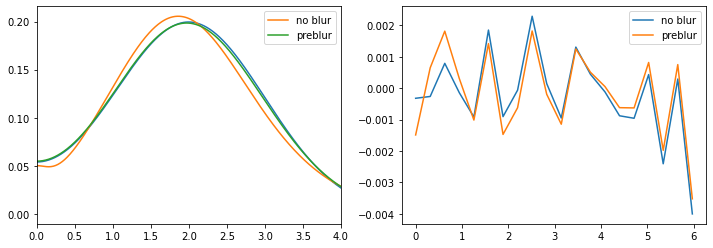

In [4]:
sol_noblur, _ = probl.solve(method='maxent_svd', alpha_determination='chi2kink', optimizer='newton', 
                    stdev=err, model=model,
                    preblur=False, blur_width=0.01,
                    alpha_start=1e12, alpha_end=1e-2, alpha_div=5.,
                    interactive=True, fit_position=2.5)
sol_preblur, _ = probl.solve(method='maxent_svd', alpha_determination='chi2kink', optimizer='newton', 
                    stdev=err, model=model,
                    preblur=True, blur_width=0.8,
                    alpha_start=1e12, alpha_end=1e-2, alpha_div=5.,
                    interactive=True, fit_position=2.5)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
ax[0].plot(w_full, spectrum)
ax[0].plot(w, sol_noblur.A_opt, label='no blur')
ax[0].plot(w, sol_preblur.A_opt, label='preblur')
ax[0].legend()
ax[0].set_xlim(0., 4.)
ax[1].plot(iw, chi - sol_noblur.backtransform, label='no blur')
ax[1].plot(iw, chi - sol_preblur.backtransform, label='preblur')
ax[1].legend()
plt.show()